In [ ]:
# Load credentials from JSON file
with open('credentials_mongodb.json') as f:
    login = json.load(f)

# Assign credentials to variables
username = login['username']
password = urllib.parse.quote(login['password'])
host = login['host']

# Construct the MongoDB connection string
url = f"mongodb+srv://{username}:{password}@{host}/?retryWrites=true&w=majority"

# MongoDB setup
client = MongoClient(url) 

# Fetch all documents from the MongoDB collection
articles = list(collection.find())

# Convert to a pandas DataFrame
df = pd.DataFrame(articles)

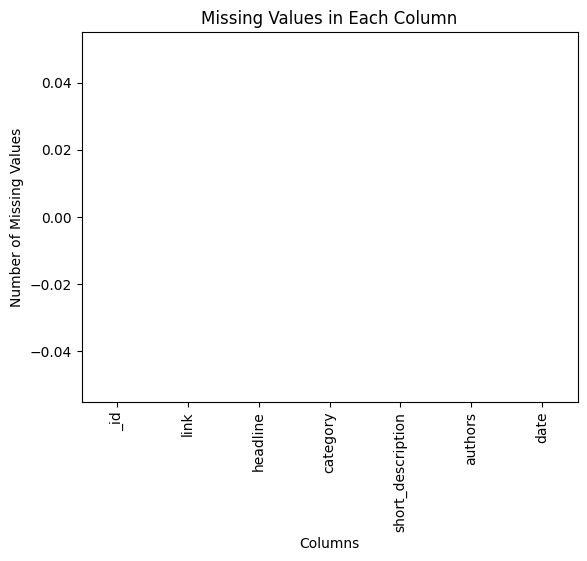

In [4]:
# Plot missing values
df.isnull().sum().plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


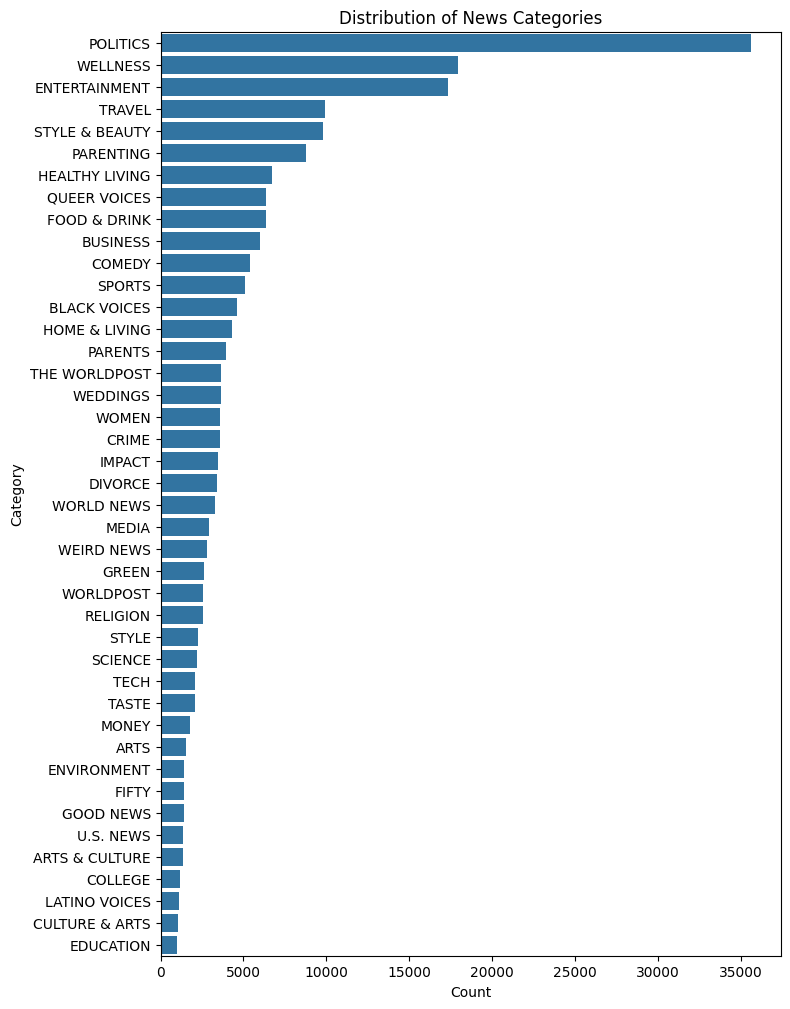

In [6]:
# Count plot for category distribution
# Visualize the Distribution of Categories
plt.figure(figsize=(8, 12))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

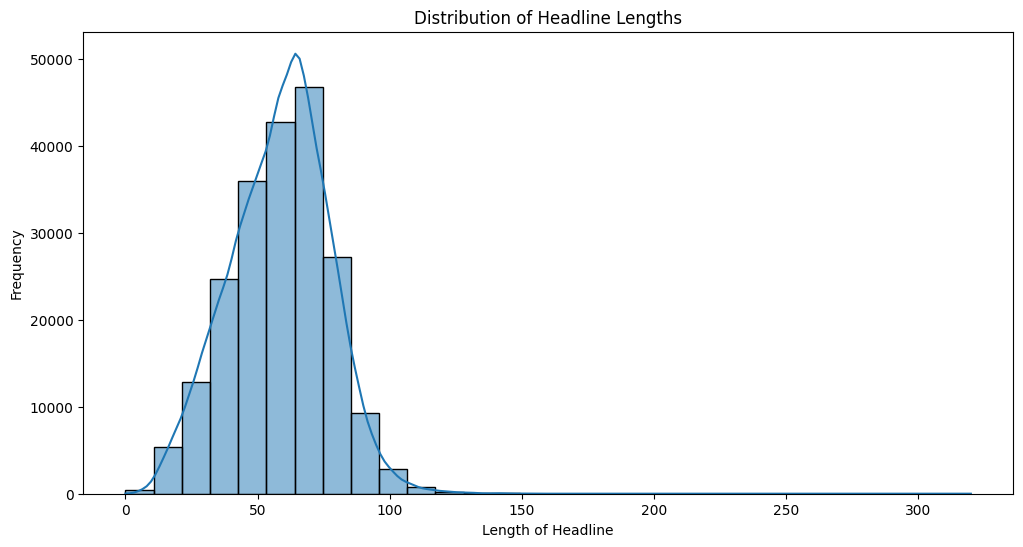

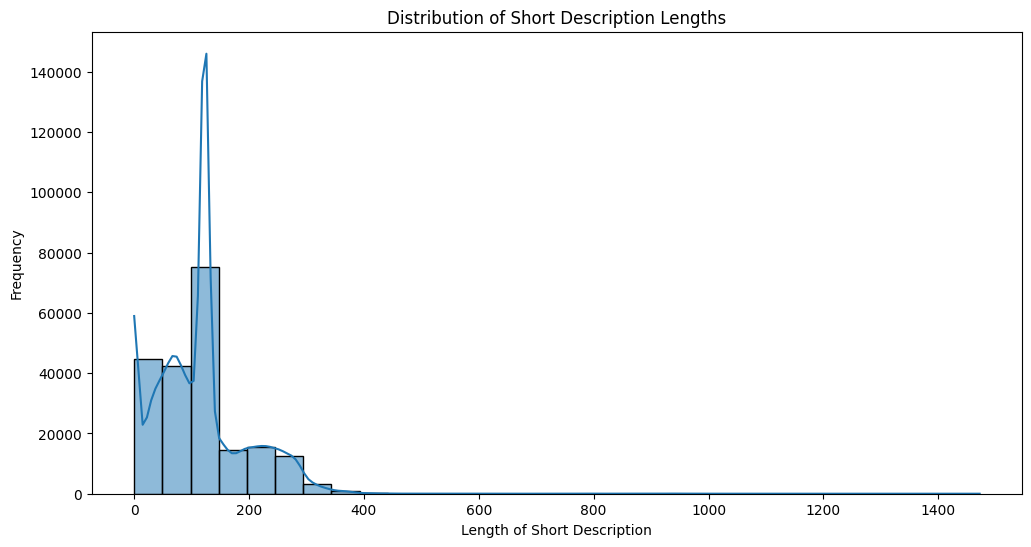

In [13]:
# Add text length features
df['headline_length'] = df['headline'].str.len()
df['short_description_length'] = df['short_description'].str.len()

# Visualize the distribution of headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of short description lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['short_description_length'], bins=30, kde=True)
plt.title('Distribution of Short Description Lengths')
plt.xlabel('Length of Short Description')
plt.ylabel('Frequency')
plt.show()
